
# Decision Tree Classifier

In [1]:
#import all the required libraries

import numpy as np
import pandas as pd
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


In [2]:
# loading lris dataset

from sklearn import datasets
df=datasets.load_iris()
print("data loaded")

data loaded


In [3]:
#defining independent and dependent variables

X=pd.DataFrame(df.data,columns=df.feature_names)
y=df.target
print(X)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# Split the data into train and test datasets

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1,stratify=y,test_size=0.3)


# Defining decision tree algorithm

In [5]:
# create decision tree classifier

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

#fitting training data

clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [6]:
#prediction on test data

y_pred=clf.predict(X_test)
print(y_pred)

[2 0 0 1 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]


In [7]:
#Accuracy of the model

from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

from sklearn.metrics import  confusion_matrix

cm=np.array(confusion_matrix(y_test,y_pred))

cm

Accuracy: 0.9777777777777777


array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

This model predicts with 97% of accuracy

# To visualize the decision tree

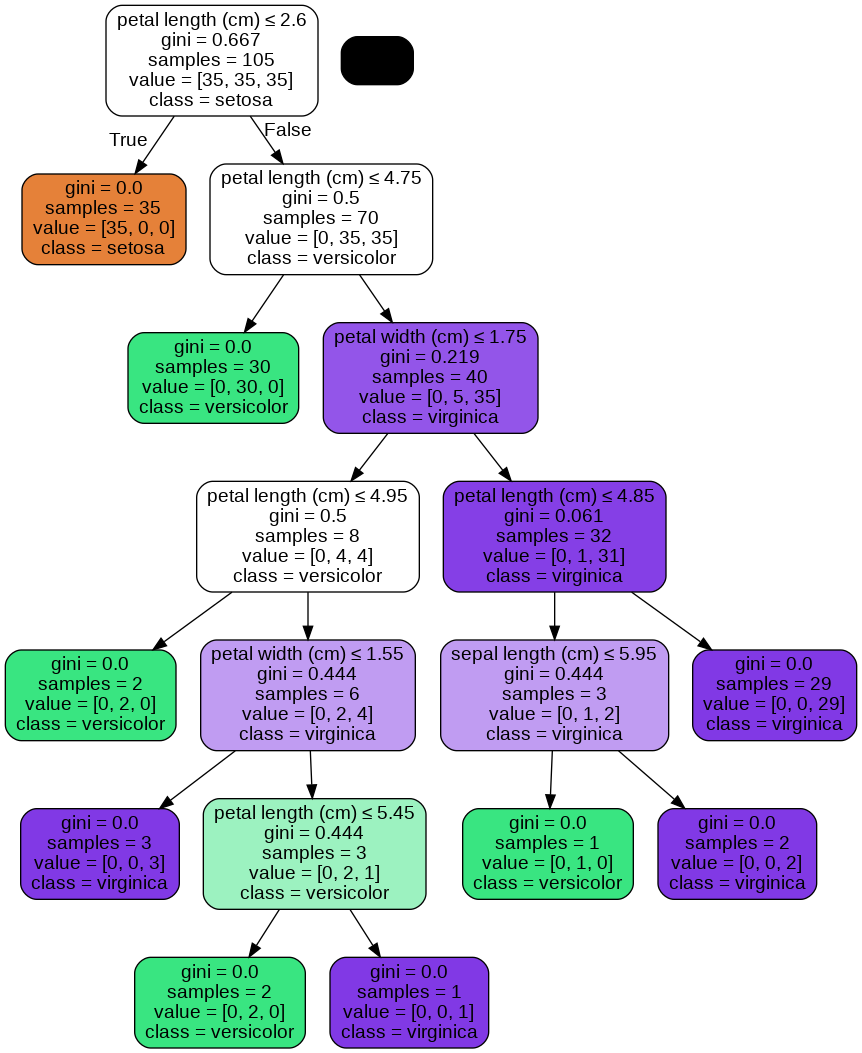

In [8]:
#visualizing decision tree of lris dataset

dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=df.feature_names,class_names=df.target_names)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())